# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [26]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data =[]
unit = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&units="+ unit +"&q=" +  city

#    Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,"Lat": city_lat,
                          "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity,"Cloudiness": city_clouds,
                          "Wind Speed": city_wind,"Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chibougamau
Processing Record 2 of Set 1 | yanam
Processing Record 3 of Set 1 | kirakira
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | al jawf
Processing Record 8 of Set 1 | puerto armuelles
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ifo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | rexburg
Processing Record 16 of Set 1 | papar
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | keetmanshoop
Processing Record 22 of Set 1 | east

Processing Record 43 of Set 4 | callao
Processing Record 44 of Set 4 | san luis de la loma
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | solnechnyy
Processing Record 47 of Set 4 | priozersk
Processing Record 48 of Set 4 | novoselytsya
Processing Record 49 of Set 4 | gescher
Processing Record 50 of Set 4 | glen innes
Processing Record 1 of Set 5 | xilin hot
Processing Record 2 of Set 5 | atuntaqui
Processing Record 3 of Set 5 | bangjun
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | tommot
Processing Record 7 of Set 5 | aykhal
Processing Record 8 of Set 5 | north battleford
Processing Record 9 of Set 5 | pandan
Processing Record 10 of Set 5 | trzebnica
Processing Record 11 of Set 5 | punta arenas
Processing Record 12 of Set 5 | palikir - national government center
Processing Record 13 of Set 5 | fonte boa
Processing Record 14 of Set 5 | port elizabeth
Processing Record 15 of Set 5 | kwang binh
P

Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | am djarass
City not found. Skipping...
Processing Record 38 of Set 8 | santana do acarau
Processing Record 39 of Set 8 | tamanrasset
Processing Record 40 of Set 8 | al bayda'
Processing Record 41 of Set 8 | guanambi
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | teknaf
Processing Record 44 of Set 8 | shanhaiguan
Processing Record 45 of Set 8 | burwell
Processing Record 46 of Set 8 | ed damer
Processing Record 47 of Set 8 | brezina
Processing Record 48 of Set 8 | makokou
Processing Record 49 of Set 8 | juneau
Processing Record 50 of Set 8 | as sulayyil
Processing Record 1 of Set 9 | la ronge
Processing Record 2 of Set 9 | ardabil
Processing Record 3 of Set 9 | little cayman
City not found. Skipping...
Processing Record 4 of Set 9 | yeraliyev
Processing Record 5 of Set 9 | princeville
Processing Record 6 of Set 9 | tolanaro
Processing Record 7 of Set 9 | sakakah
Processing Record 8 of Set

Processing Record 26 of Set 12 | sudzha
Processing Record 27 of Set 12 | canto do buriti
Processing Record 28 of Set 12 | santana
Processing Record 29 of Set 12 | pantai remis
Processing Record 30 of Set 12 | derbent
Processing Record 31 of Set 12 | amga
Processing Record 32 of Set 12 | san pedro pochutla
Processing Record 33 of Set 12 | nueil-les-aubiers
Processing Record 34 of Set 12 | abra pampa
Processing Record 35 of Set 12 | aghajari
Processing Record 36 of Set 12 | andergrove
Processing Record 37 of Set 12 | mobara
Processing Record 38 of Set 12 | villa mercedes
Processing Record 39 of Set 12 | tenno
Processing Record 40 of Set 12 | arawa
Processing Record 41 of Set 12 | zemio
Processing Record 42 of Set 12 | port-vila
Processing Record 43 of Set 12 | berbera
Processing Record 44 of Set 12 | remire-montjoly
Processing Record 45 of Set 12 | nyamira
Processing Record 46 of Set 12 | labytnangi
Processing Record 47 of Set 12 | weyburn
Processing Record 48 of Set 12 | brokopondo
Proc

In [29]:
#view city data
print(city_data)

[{'City': 'chibougamau', 'Lat': 49.9168, 'Lng': -74.3659, 'Max Temp': 14.79, 'Humidity': 88, 'Cloudiness': 100, 'Wind Speed': 1.03, 'Country': 'CA', 'Date': 1691719982}, {'City': 'yanam', 'Lat': 16.7333, 'Lng': 82.2167, 'Max Temp': 29.4, 'Humidity': 64, 'Cloudiness': 99, 'Wind Speed': 2.31, 'Country': 'IN', 'Date': 1691719983}, {'City': 'kirakira', 'Lat': -10.4544, 'Lng': 161.9205, 'Max Temp': 25.05, 'Humidity': 83, 'Cloudiness': 100, 'Wind Speed': 6.2, 'Country': 'SB', 'Date': 1691719983}, {'City': 'longyearbyen', 'Lat': 78.2186, 'Lng': 15.6401, 'Max Temp': 8.91, 'Humidity': 87, 'Cloudiness': 100, 'Wind Speed': 1.03, 'Country': 'SJ', 'Date': 1691719983}, {'City': 'thompson', 'Lat': 55.7435, 'Lng': -97.8558, 'Max Temp': 15.09, 'Humidity': 67, 'Cloudiness': 100, 'Wind Speed': 1.03, 'Country': 'CA', 'Date': 1691719983}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 3.33, 'Humidity': 77, 'Cloudiness': 49, 'Wind Speed': 16.3, 'Country': 'TF', 'Date': 1691719983},

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chibougamau,49.9168,-74.3659,14.79,88,100,1.03,CA,1691719982
1,yanam,16.7333,82.2167,29.40,64,99,2.31,IN,1691719983
2,kirakira,-10.4544,161.9205,25.05,83,100,6.20,SB,1691719983
3,longyearbyen,78.2186,15.6401,8.91,87,100,1.03,SJ,1691719983
4,thompson,55.7435,-97.8558,15.09,67,100,1.03,CA,1691719983


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,14.79,88,100,1.03,CA,1691719982
1,yanam,16.7333,82.2167,29.40,64,99,2.31,IN,1691719983
2,kirakira,-10.4544,161.9205,25.05,83,100,6.20,SB,1691719983
3,longyearbyen,78.2186,15.6401,8.91,87,100,1.03,SJ,1691719983
4,thompson,55.7435,-97.8558,15.09,67,100,1.03,CA,1691719983


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

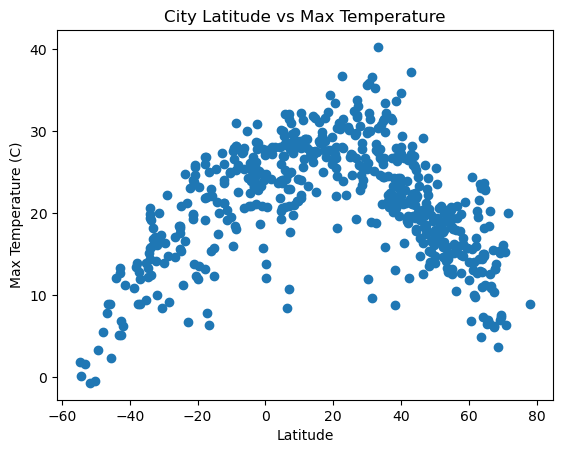

In [36]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

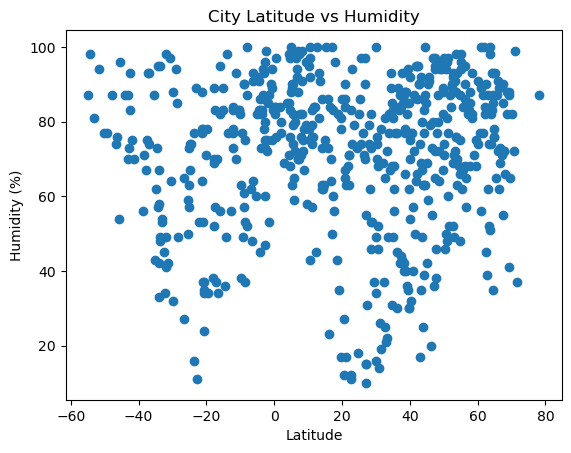

In [37]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

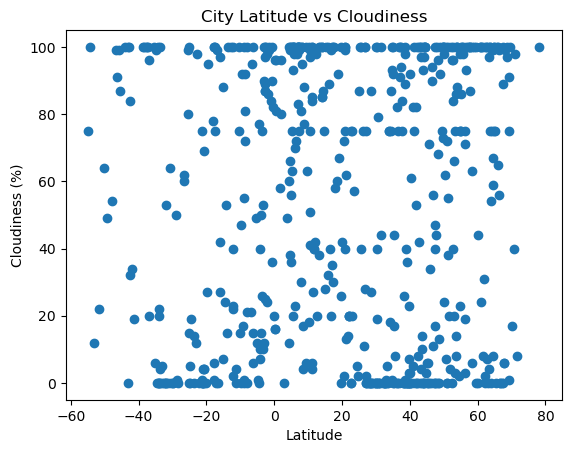

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

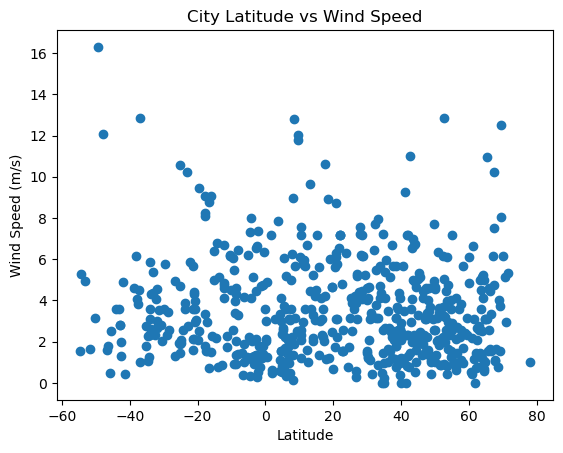

In [39]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values=slope*x_values+intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq="y = " + str(round(slope,3)) + "x +" + str(round(intercept,3))
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()



In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,14.79,88,100,1.03,CA,1691719982
1,yanam,16.7333,82.2167,29.40,64,99,2.31,IN,1691719983
3,longyearbyen,78.2186,15.6401,8.91,87,100,1.03,SJ,1691719983
4,thompson,55.7435,-97.8558,15.09,67,100,1.03,CA,1691719983
6,al jawf,29.5000,38.7500,26.73,37,0,5.25,SA,1691719983


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kirakira,-10.4544,161.9205,25.05,83,100,6.20,SB,1691719983
5,port-aux-francais,-49.3500,70.2167,3.33,77,49,16.30,TF,1691719983
8,grytviken,-54.2811,-36.5092,0.14,98,100,5.28,GS,1691719983
10,ushuaia,-54.8000,-68.3000,1.81,87,75,1.54,AR,1691719370
16,carnarvon,-24.8667,113.6333,20.88,67,5,2.09,AU,1691719984


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4098539113083305


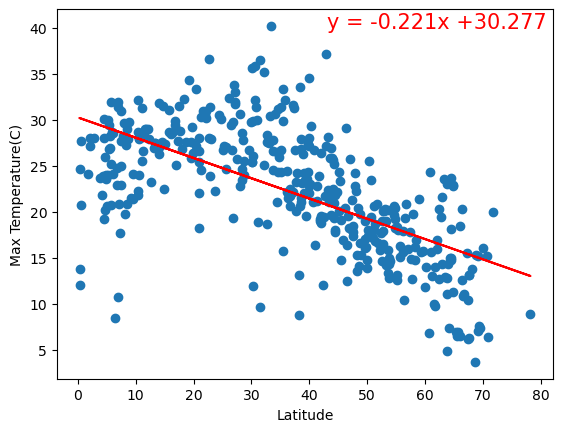

In [43]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature(C)")
plot_linear_regression(x_values, y_values,"Max Temp", (43,40))


The r-squared is: 0.6561432549081428


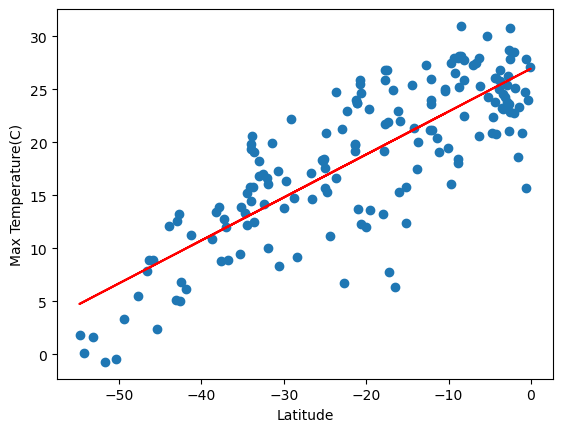

In [44]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature(C)")
plot_linear_regression(x_values, y_values,"Max Temp", (-50,35))

**Discussion about the linear relationship:** There is a positive correlation(Positive slope) between the Latitude and Maximum temperature in the Southern Hemisphere compared to a negative association(negative slope) in the Northern Hemisphere. In other words, as you move away from the equator, the temperature tends to decrease. It seems like temperatures are typically warmer approaching the equator and cooler towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 9.453512640406323e-05


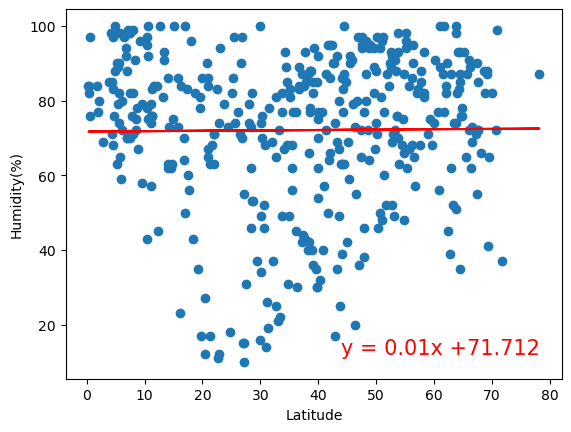

In [45]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plt.ylabel("Humidity(%)")
plot_linear_regression(x_values, y_values, "Humidity", (44,12))


The r-squared is: 0.005990480032135848


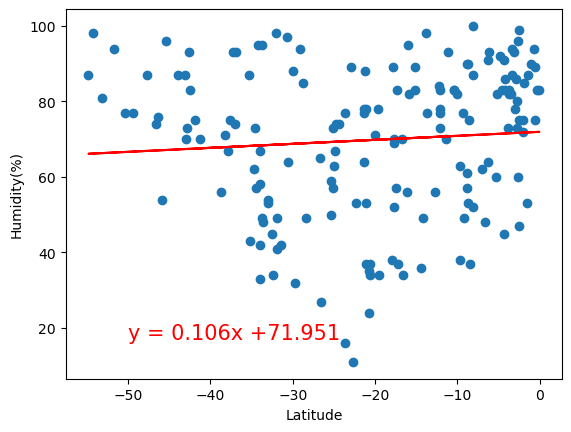

In [46]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plt.ylabel("Humidity(%)")
plot_linear_regression(x_values, y_values, "Humidity", (-50,17))

**Discussion about the linear relationship:** From the data for both hemisphere, it seems like there is no or very minimal correlation between Latitude and humidity (r-squared is very close to 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0029993479477082737


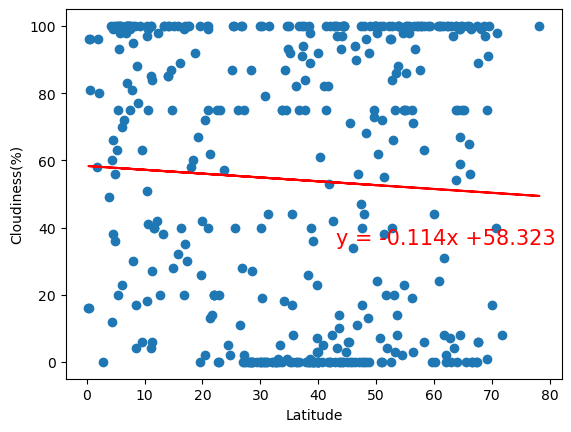

In [47]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plot_linear_regression(x_values, y_values, "Cloudiness", (43,35))

The r-squared is: 0.0008239913503643807


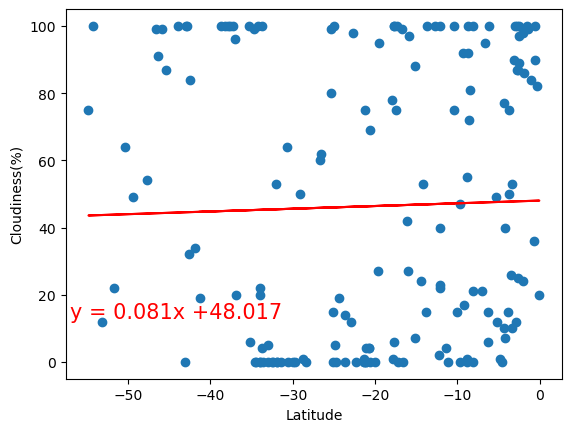

In [48]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plot_linear_regression(x_values, y_values, "Cloudiness", (-57,13))

**Discussion about the linear relationship:** No correlation between Latitude and cloudiness for both the northern and southern hemisphere as seen from the r-square value of about 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005512159153715682


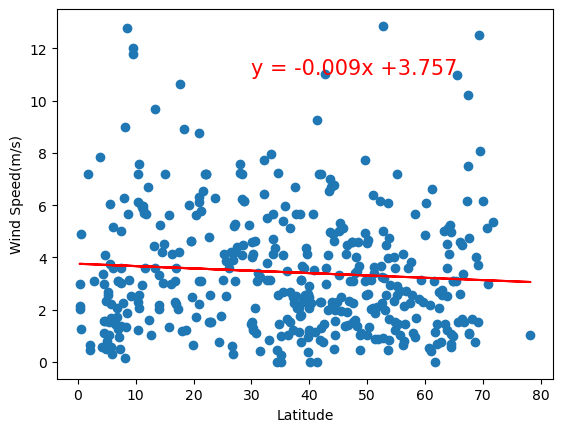

In [49]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed(m/s)")
plot_linear_regression(x_values, y_values, "Wind Speed", (30,11))

The r-squared is: 0.011831407321721943


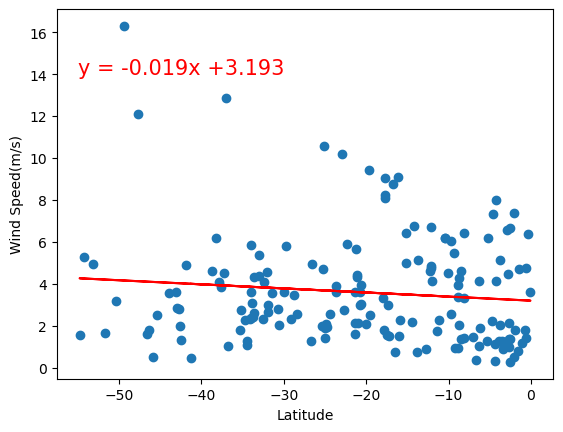

In [50]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed(m/s)")
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,14))

**Discussion about the linear relationship:** No correlation between Latitude and wind speed for both the northern and southern hemisphere as seen from the r-square value of about 0.